In [305]:
##importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from collections import defaultdict
import stack_clean as t

# Project: Write a data science blog post

### Table of Contents
    1. Business Understanding
    2. Data Understanding
    3. Prepare Data
    4. Modeling
    5. Evaluation

## 1. Business Understanding

Stack Overflow is a platform where students and professionals post queries and answer questions about programming. It has a lot of helpful answers to programming questions that help many users. Different types of developers use Stack Overflow to find answers to their questions. 
        1. Which type of developers does Stack Overflow have? 
        2. How satisfied are they with Stack Overflow? 
        3. What drives Stack Overflow satisfaction?

## 2. Data Understanding

**Gather data**

In [310]:
df = pd.read_csv("./survey_results_public.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

**Assess data**

In [276]:
##All Columns
pd.options.display.max_columns = 200
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [29]:
##Numeric Columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics)

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,1,NaN,NaN,0.0,9.0,NaN,NaN
1,2,NaN,NaN,NaN,8.0,NaN,37500.0
2,3,8.0,9.0,NaN,8.0,113750.0,NaN
3,4,6.0,3.0,5.0,10.0,NaN,NaN
4,5,6.0,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
51387,51388,7.0,3.0,5.0,9.0,58000.0,NaN
51388,51389,NaN,NaN,NaN,7.0,NaN,NaN
51389,51390,10.0,10.0,NaN,NaN,NaN,NaN
51390,51391,6.0,7.0,1.0,9.0,40000.0,NaN


## 3. Data Preparation

**Cleaning Data**

We will be using following columns for the analysis:
        
    1. DeveloperType
    2. StackOverflowSatisfaction
    3. StackOverflowFoundAnswer
        

In [353]:
##Removing NAs and selecting relevant columns

df_clean = df.dropna(axis=0,subset=['DeveloperType','StackOverflowSatisfaction','StackOverflowFoundAnswer'])[['DeveloperType','StackOverflowSatisfaction','StackOverflowFoundAnswer']]
df_clean = df_clean.reset_index(drop=True)
df_clean.head()

,DeveloperType,StackOverflowSatisfaction,StackOverflowFoundAnswer
0,Other,8.0,Once or twice
1,Web developer,7.0,Once or twice
2,Web developer; Mobile developer,8.0,Several times
3,Mobile developer; Desktop applications developer,9.0,Several times
4,Web developer,10.0,Several times


**Analyze Data**

### Understanding StackOverflow Users

#### Q1 - Which Developer Type users visit StackOverflow?

In [355]:
### bar plot for profession
dev_type = df_clean.DeveloperType.value_counts()
dev_type

Web developer                                                                                                                                                                     7359
Web developer; Desktop applications developer                                                                                                                                     1399
Web developer; Mobile developer                                                                                                                                                   1051
Desktop applications developer                                                                                                                                                    1010
Mobile developer                                                                                                                                                                  1003
                                                                                     

#### Who are visiting Stackoverflow?

In [356]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

def clean_and_plot(df, title='Developer Type', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the DeveloperType column.
    '''
    study = df['DeveloperType'].value_counts().reset_index()
    study.rename(columns={'index': 'Type', 'DeveloperType': 'count'}, inplace=True)
    study_df = total_count(study, 'Type', 'count', possible_vals)

    study_df.set_index('Type', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

**Visualize Data**

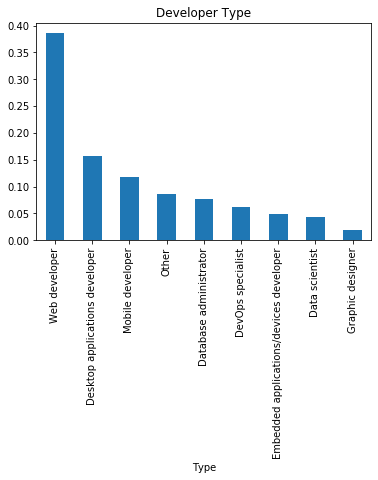

In [357]:
possible_vals = ["Web developer", "Desktop applications developer", 
                 "None of these", "Mobile developer", "Desktop applications developer	",
                 "Data scientist", "Other", "DevOps specialist",
                 "Database administrator", "Embedded applications/devices developer",
                 "Graphic designer", "Other"
                ]

props_df = clean_and_plot(df_clean)


Developer Type proportion

#### Q2 Who are more satisfied?

## 4. Modeling

In [358]:
##Applying Function

devtype_js = t.clean_df(df_clean,col1="DeveloperType",col2="StackOverflowSatisfaction",look_for=possible_vals)
devtype_js.head()

,DeveloperType,StackOverflowSatisfaction
0,Web developer,7.0
0,Web developer,8.0
0,Web developer,10.0
0,Web developer,7.0
0,Web developer,8.0


In [360]:
##Object to float
devtype_js.StackOverflowSatisfaction = devtype_js.StackOverflowSatisfaction.astype(float)

In [361]:
## difference from mean

js_plot = (devtype_js.groupby(['DeveloperType'])[['StackOverflowSatisfaction']].mean()-devtype_js.StackOverflowSatisfaction.mean()).reset_index(drop=False)

js_plot


,DeveloperType,StackOverflowSatisfaction
0,Data scientist,0.019975
1,Database administrator,0.054303
2,Desktop applications developer,-0.010812
3,DevOps specialist,-0.099092
4,Embedded applications/devices developer,-0.120247
5,Graphic designer,-0.030666
6,Mobile developer,0.097526
7,Other,-0.296037
8,Web developer,0.061142


**Visualize Data**

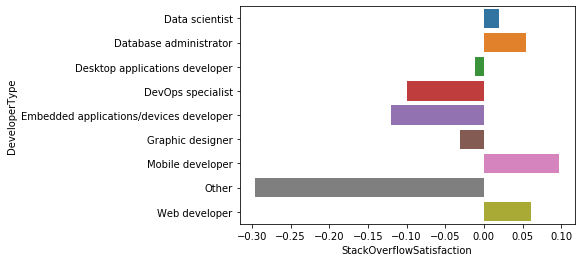

In [362]:
##Plot of difference in StackOverflow Satisfaction mean with overall mean
sns.barplot(x='StackOverflowSatisfaction', y='DeveloperType', data=js_plot)

Figure above - Comparison(Difference) of average StackOverflow Satisfaction mean with overall mean

#### Q3 What drives SO satisfaction

**Modeling**

In [364]:
##Found answers difference from mean
found_answers = (df.groupby(['StackOverflowFoundAnswer'])[['StackOverflowSatisfaction']].mean()-df.StackOverflowSatisfaction.mean()).reset_index(drop=False)
found_answers.head()

,StackOverflowFoundAnswer,StackOverflowSatisfaction
0,At least once each day,0.553644
1,At least once each week,0.214739
2,Haven't done at all,-1.223090
3,Once or twice,-0.843717
4,Several times,-0.149432


**Visualize**

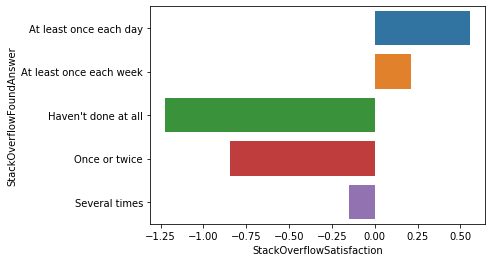

In [370]:
##Plot
sns.barplot(x='StackOverflowSatisfaction', y='StackOverflowFoundAnswer', data=found_answers)

Figure above - Comparison(Difference) of average StackOverflow Satisfaction mean with overall mean

Users who find their answers are more satisfied?
Is more satisfied group finding answers more often?

**Modeling**

In [366]:
devtype_fa = t.clean_df(df,col1="DeveloperType",col2="StackOverflowFoundAnswer",look_for=possible_vals)
devtype_fa.head()

,DeveloperType,StackOverflowFoundAnswer
0,Web developer,Once or twice
0,Web developer,Several times
0,Web developer,Several times
0,Web developer,Several times
0,Web developer,At least once each week


Let's group users who found answers frequently

In [367]:
##apply function
devtype_fa["FrequentlyFoundAnswer"] = devtype_fa.apply(t.frequency, axis=1)

In [368]:


devtype_fa_plot = ((((devtype_fa.groupby(["DeveloperType"]).apply(lambda x: x['FrequentlyFoundAnswer'].sum()/x['FrequentlyFoundAnswer'].count()))-(devtype_fa.FrequentlyFoundAnswer.sum()/devtype_fa.FrequentlyFoundAnswer.count())).to_frame(name='FrequentlyFoundAnswers')).reset_index(drop=False))

devtype_fa_plot.head()

,DeveloperType,FrequentlyFoundAnswers
0,Data scientist,0.031496
1,Database administrator,-0.000996
2,Desktop applications developer,-0.026416
3,DevOps specialist,-0.013001
4,Embedded applications/devices developer,-0.045931


**Visualize**

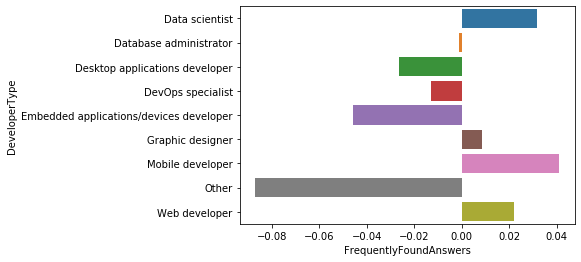

In [369]:
##Plot

sns.barplot(x='FrequentlyFoundAnswers', y='DeveloperType', data=devtype_fa_plot)

Figure above - Comparison(Difference) of %Times Frequently Found Answers with overall %%Times Frequently Found Answers

## 5. Evaluation

We took a look at understanding Stack Overflow users according to Stack Overflow 2017 survey data.

    1. We looked at data of different types of developers and found that most of the Stack Overflow users are Web Developers.
    2. We then looked at how Stack Overflow satisfaction varies among different developers. Data Scientists, Web Developers and Mobile Developers are more satisfied with Stack Overflow than other Developers.
    3. Finally, we looked at what could be driving the Stack Overflow satisfaction among different types of developers. Users who are finding the answers more frequently are more satisfied.